In [1]:
#imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#contains synergy values and fold split (numbers 0-4)
labels_file_path = "/home/nidhi/Documents/freelancing/DeepSynergy/data/labels.csv"
labels = pd.read_csv( labels_file_path, index_col=0)

#labels are duplicated for the two different ways of ordering in the data
labels = pd.concat([labels, labels]) 

print(labels.head())
print(labels.shape)

                   drug_a_name drug_b_name cell_line   synergy  fold
5-FU_ABT-888_A2058        5-FU     ABT-888     A2058  7.693530     2
5-FU_ABT-888_A2780        5-FU     ABT-888     A2780  7.778053     2
5-FU_ABT-888_A375         5-FU     ABT-888      A375 -1.198505     2
5-FU_ABT-888_A427         5-FU     ABT-888      A427  2.595684     2
5-FU_ABT-888_CAOV3        5-FU     ABT-888     CAOV3 -5.139971     2
(46104, 5)


In [3]:
#grouped by cell_line. This will be used for density plots.
grouped = labels.groupby('cell_line')

for name,group in grouped:
   print(name)
   print(group.shape)

A2058
(1208, 5)
A2780
(1166, 5)
A375
(1208, 5)
A427
(1208, 5)
CAOV3
(1208, 5)
COLO320DM
(1208, 5)
DLD1
(1166, 5)
EFM192B
(1208, 5)
ES2
(1208, 5)
HCT116
(1208, 5)
HT144
(1166, 5)
HT29
(1208, 5)
KPL1
(1166, 5)
LNCAP
(1166, 5)
LOVO
(1208, 5)
MDAMB436
(1166, 5)
MSTO
(1166, 5)
NCIH1650
(1208, 5)
NCIH2122
(1208, 5)
NCIH23
(1208, 5)
NCIH460
(1166, 5)
NCIH520
(1166, 5)
OCUBM
(1166, 5)
OV90
(1166, 5)
OVCAR3
(1166, 5)
PA1
(1208, 5)
RKO
(1166, 5)
RPMI7951
(1166, 5)
SKMEL30
(1166, 5)
SKMES1
(1166, 5)
SKOV3
(1166, 5)
SW620
(1208, 5)
SW837
(1166, 5)
T47D
(1166, 5)
UACC62
(1166, 5)
UWB1289
(1166, 5)
UWB1289BRCA1
(1166, 5)
VCAP
(1166, 5)
ZR751
(1166, 5)


Working on cell-line data density plot. y-axis = density. X = synergy values. 

                      drug_a_name drug_b_name cell_line    synergy  fold
5-FU_ABT-888_A2058           5-FU     ABT-888     A2058   7.693530     2
5-FU_AZD1775_A2058           5-FU     AZD1775     A2058  13.052687     1
5-FU_BEZ-235_A2058           5-FU     BEZ-235     A2058  13.679112     1
5-FU_BORTEZOMIB_A2058        5-FU  BORTEZOMIB     A2058  -5.239878     2
5-FU_DASATINIB_A2058         5-FU   DASATINIB     A2058  31.125644     1
(1208, 5)


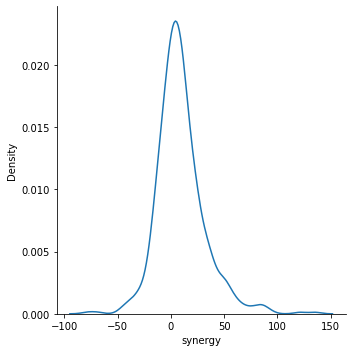

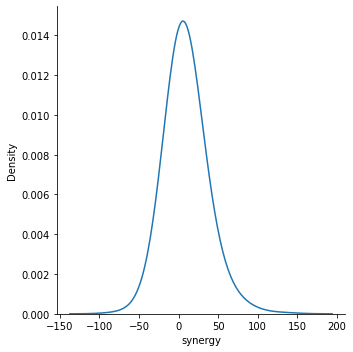

In [4]:
#lets plot one.
A2058_data = grouped.get_group('A2058')
print(A2058_data.head())
print(A2058_data.shape)

#print(A2058_data.synergy.values)
sns.displot(A2058_data, x= A2058_data.synergy, kind="kde")

#density plot with bandwidth option
bandwidth = 3.589
sns.displot(A2058_data, x= A2058_data.synergy, kind="kde", bw_adjust = bandwidth)

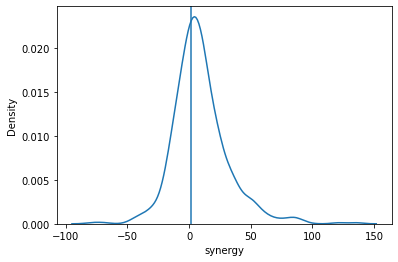

In [5]:
# plot prediction and density plot together
#fake prediction variable.
fake_pred = 1.5  

graph = sns.kdeplot(A2058_data["synergy"])
graph.axvline(fake_pred)
plt.show()


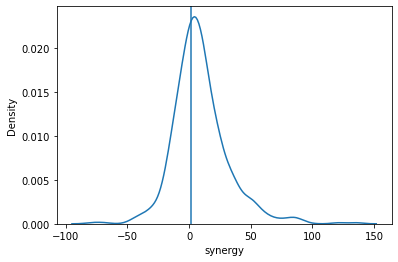

In [6]:
# another way to do the make the above plot. (Using fig, ax)
fig, ax = plt.subplots()
sns.kdeplot(A2058_data["synergy"], ax = ax)
ax.axvline(x=fake_pred)  #can use synergy value from dataset or predicted synergy score from model.
plt.show()


In [7]:
#add x-"N = {0} Bandwidth = {1}".format(A2058_data.shape[0], bandwidth)title
print()

Plot with bandwidth = 3.589

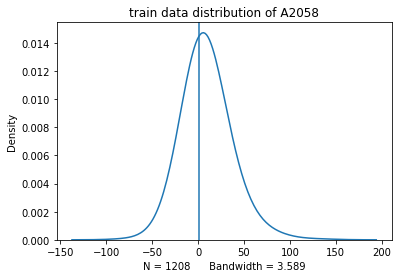

In [10]:
# plot prediction and density plot together
#fake prediction variable.
fake_pred = 1.5  
bandwidth = 3.589
cell_line_name = "A2058"

graph = sns.kdeplot(A2058_data["synergy"], bw_adjust= 3.589)
graph.axvline(fake_pred)
plt.xlabel("N = {0}      Bandwidth = {1}".format(A2058_data.shape[0], bandwidth))
plt.title("train data distribution of {0}".format(cell_line_name))
plt.show()


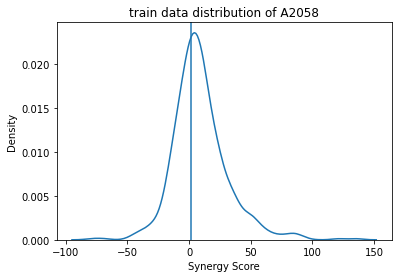

In [13]:
# plot prediction and density plot together
#fake prediction variable.
fake_pred = 1.5  
bandwidth = 3.589
cell_line_name = "A2058"

graph = sns.kdeplot(A2058_data["synergy"])
graph.axvline(fake_pred)
plt.xlabel("Synergy Score")
plt.title("train data distribution of {0}".format(cell_line_name))
plt.show()
